# Bitwise And

需要上傳`lena.bmp`灰階圖

In [22]:
!pip install opencv-contrib-python -U

Requirement already up-to-date: opencv-contrib-python in /usr/local/lib/python3.7/dist-packages (4.5.1.48)


In [23]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

print(cv2.__version__)

4.5.1


# 矩陣位元相加

In [24]:
a=np.random.randint(0,255,(5,5),dtype=np.uint8)
a2=np.ones((5,5),dtype=np.uint8)
b=np.zeros((5,5),dtype=np.uint8)
b[0:3,0:3]=255
b[4,4]=255
c=cv2.bitwise_and(a,b)
c2=cv2.bitwise_and(a2,b)
d=cv2.bitwise_or(a2,b)
e=cv2.bitwise_xor(a2,b)

print("a=\n",a)
print("a2=\n",a2)
print("b=\n",b)
print("c=\n",c)
print("c2=\n",c2)
print("d=\n",d)
print("e=\n",e)

a=
 [[220 200  78  98 193]
 [105  47 174  98 140]
 [156 160   9  52  23]
 [240 211 192  25 110]
 [180 203  52 101  82]]
a2=
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
b=
 [[255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 255]]
c=
 [[220 200  78   0   0]
 [105  47 174   0   0]
 [156 160   9   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0  82]]
c2=
 [[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
d=
 [[255 255 255   1   1]
 [255 255 255   1   1]
 [255 255 255   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1 255]]
e=
 [[254 254 254   1   1]
 [254 254 254   1   1]
 [254 254 254   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1 254]]


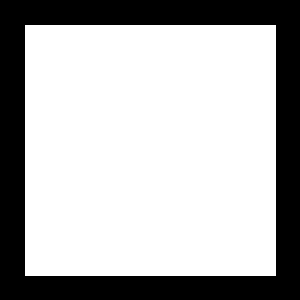

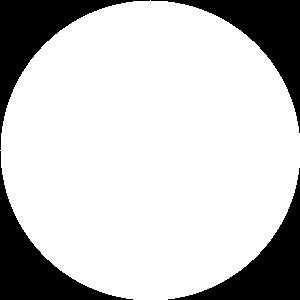

In [25]:
# draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2_imshow(rectangle)

# draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2_imshow(circle)

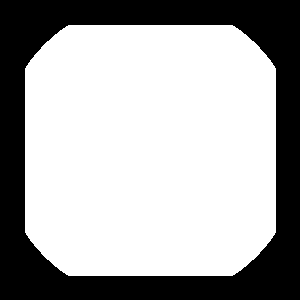

In [26]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2_imshow(bitwiseAnd)

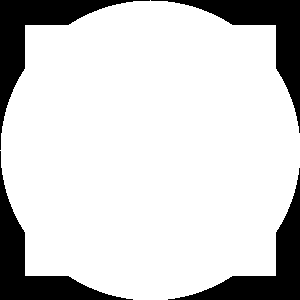

In [27]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2_imshow(bitwiseOr)

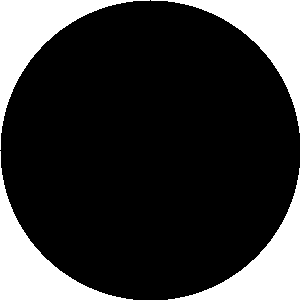

In [28]:
bitwiseNot = cv2.bitwise_not(circle)
cv2_imshow(bitwiseNot)

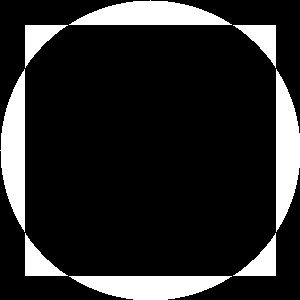

In [29]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2_imshow(bitwiseXor)


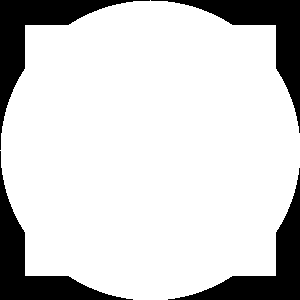

In [30]:
add = cv2.add(rectangle, circle)
cv2_imshow(add)

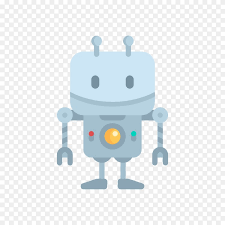

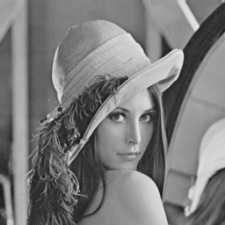

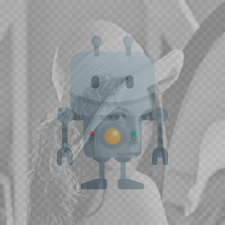

In [31]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('lena2.bmp')
img2 = cv2.resize(img2, (225, 225), interpolation=cv2.INTER_AREA)##需先將照片更改成語來源檔案大小相同

dst = cv2.addWeighted(img1,0.5,img2,0.3,0.3)#調整融合比

cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(dst)

# 圖片位元相加

(256, 256)


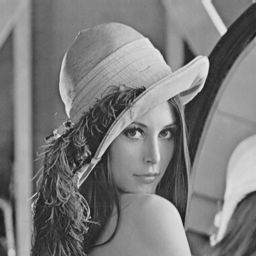

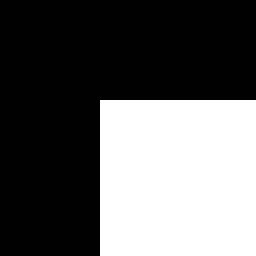

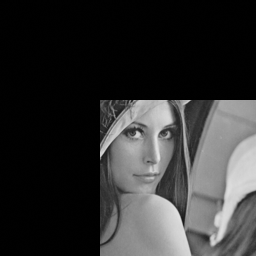

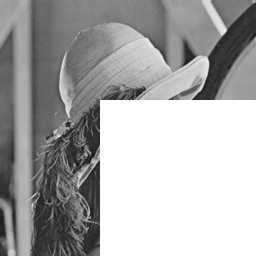

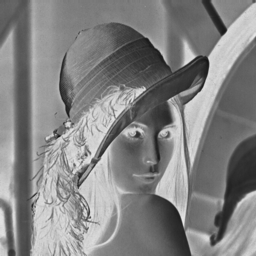

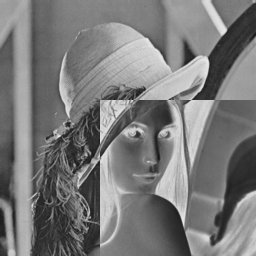

In [32]:
a = cv2.imread("lena2.bmp",0)
print(a.shape)
b = np.ones(a.shape,dtype=np.uint8)
b[100:400,200:400] = 255
b[100:500,100:200] = 255
c = cv2.bitwise_and(a, b)
d = cv2.bitwise_or(a, b)
e = cv2.bitwise_not(a)
f = cv2.bitwise_xor(a, b)

cv2_imshow(a)
cv2_imshow(b)
cv2_imshow(c)
cv2_imshow(d)
cv2_imshow(e)
cv2_imshow(f)



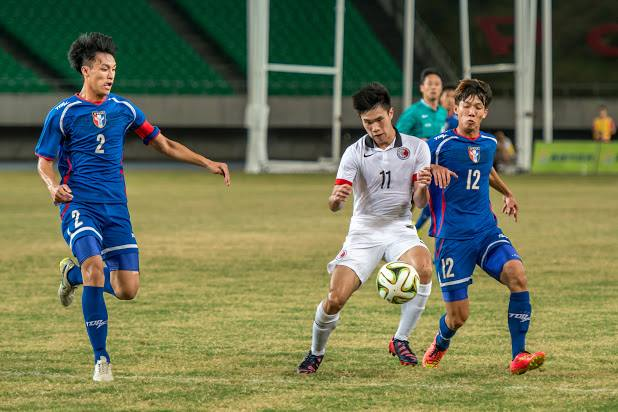

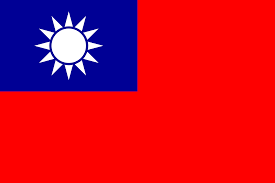

In [34]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv_logo.png')

cv2_imshow(img1)
cv2_imshow(img2)



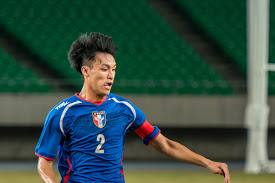

In [35]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

cv2_imshow(roi)

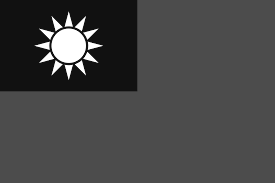

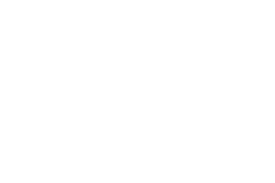

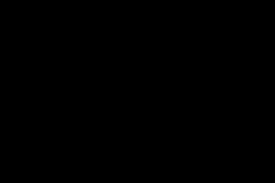

In [36]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cv2_imshow(img2gray)
cv2_imshow(mask)
cv2_imshow(mask_inv)


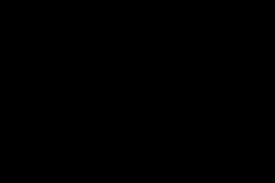

In [37]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2_imshow(img1_bg)


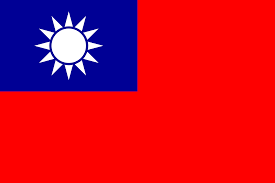

In [38]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
cv2_imshow(img2_fg)


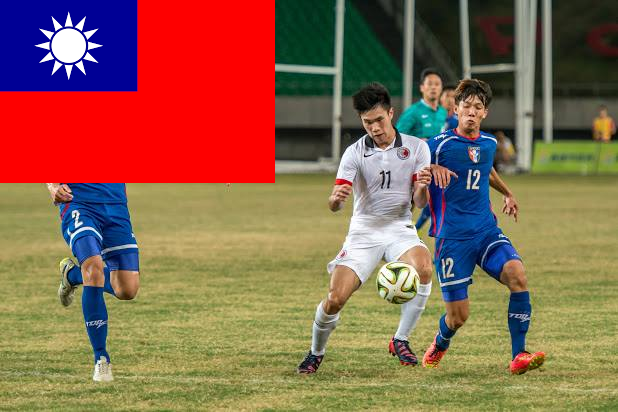

In [39]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2_imshow(img1)

# 位平面分解

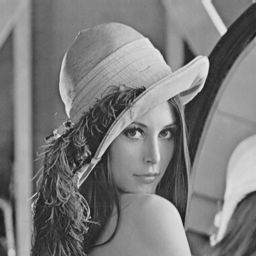

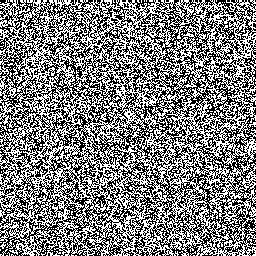

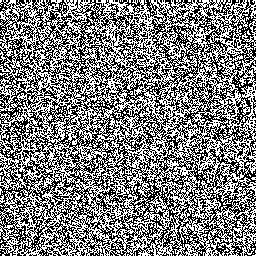

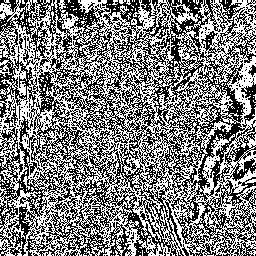

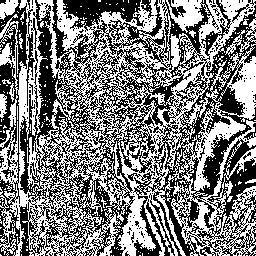

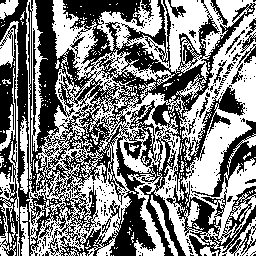

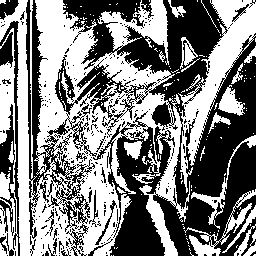

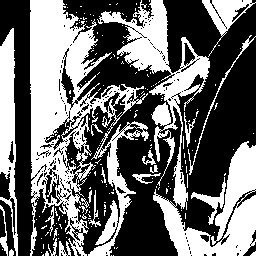

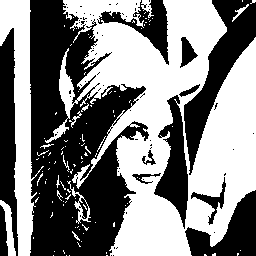

In [40]:
lena=cv2.imread("lena2.bmp",0)
cv2_imshow(lena)
r,c=lena.shape
x=np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    x[:,:,i]=2**i
r=np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    r[:,:,i]=cv2.bitwise_and(lena,x[:,:,i])
    mask=r[:,:,i]>0
    r[mask]=255
    cv2_imshow(r[:,:,i])


# 影像加密及解密

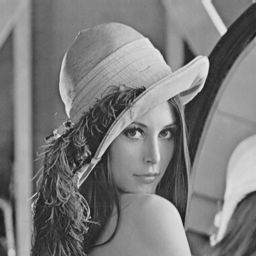

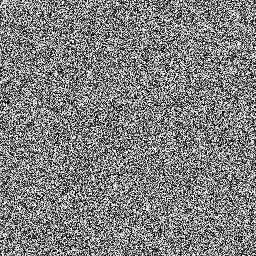

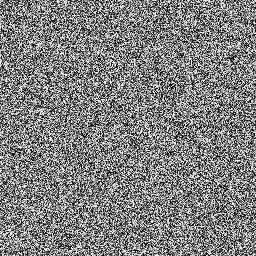

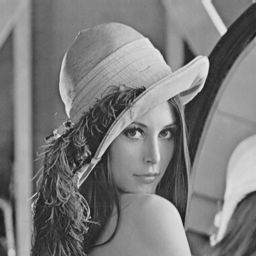

In [41]:
lena=cv2.imread("lena2.bmp",0)
r,c=lena.shape
key=np.random.randint(0,256,size=[r,c],dtype=np.uint8)
encryption=cv2.bitwise_xor(lena,key)
decryption=cv2.bitwise_xor(encryption,key)
cv2_imshow(lena)
cv2_imshow(key)
cv2_imshow(encryption)
cv2_imshow(decryption)
